,ds,y
45383,2013-01-17 11:00:00,38.0
21939,2013-01-17 12:00:00,47.0
42787,2013-01-17 13:00:00,44.0
35593,2013-01-17 14:00:00,20.0
35595,2013-01-17 15:00:00,35.0


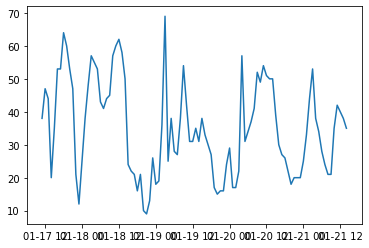

In [58]:
# load JSON
import json
import pandas as pd
 
data = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-PM10.pkl')
data = data.sort_values(by=['ds'])

df = data[400:500]

import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters() # this resolves some issues with data type
plt.plot(df['ds'],df['y'])
df.head()

In [60]:
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df = df.set_index('ds')
df.head()

/home/aety/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,level_0,index,y
ds,,,
2013-01-17 11:00:00,0,45383,38.0
2013-01-17 12:00:00,1,21939,47.0
2013-01-17 13:00:00,2,42787,44.0
2013-01-17 14:00:00,3,35593,20.0
2013-01-17 15:00:00,4,35595,35.0


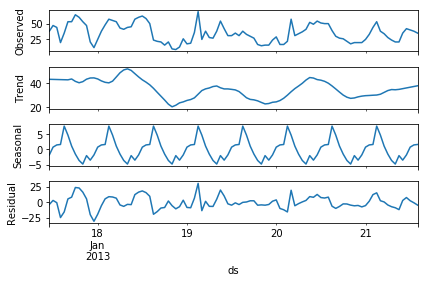

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.y, model='additive',freq=12, extrapolate_trend='freq')
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()
plt.show()